In [14]:
import xarray as xr
%matplotlib inline
import numpy as np

In [12]:
from xhistogram.xarray import histogram

In [33]:
# Read WOA using opendap 
Temp_url = 'http://apdrc.soest.hawaii.edu:80/dods/public_data/WOA/WOA13/1_deg/annual/temp'
Salt_url = 'http://apdrc.soest.hawaii.edu:80/dods/public_data/WOA/WOA13/1_deg/annual/salt'
Oxy_url = 'http://apdrc.soest.hawaii.edu:80/dods/public_data/WOA/WOA13/1_deg/annual/doxy'
Temp = xr.open_dataset(Temp_url)
Salt = xr.open_dataset(Salt_url)
Oxygen = xr.open_dataset(Oxy_url)

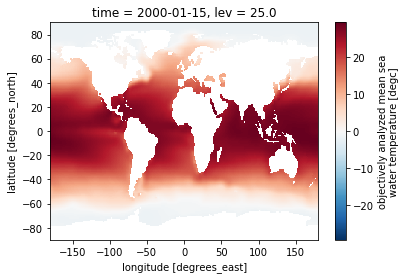

In [9]:
Temp.isel(time=0, lev=5).tan.plot()

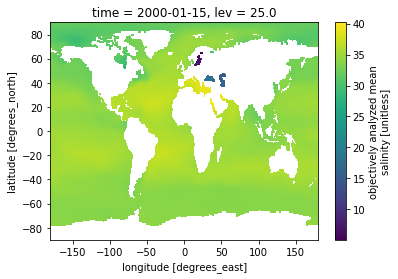

In [11]:
Salt.isel(time=0, lev=5).san.plot()

In [15]:
sbins = np.arange(31,38, 0.025)
tbins = np.arange(-2, 32, 0.1)

In [16]:
# histogram of number of data points
hTS = histogram(Salt.san, Temp.tan, bins=[sbins, tbins])

In [17]:
hTS

<xarray.DataArray 'histogram_san_tan' (san_bin: 279, tan_bin: 339)>
array([[ 0,  0, 26, ...,  0,  0,  0],
       [ 0,  0, 29, ...,  0,  0,  0],
       [ 0,  0, 25, ...,  0,  0,  0],
       ...,
       [ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0]])
Coordinates:
  * san_bin  (san_bin) float64 31.01 31.04 31.06 31.09 ... 37.91 37.94 37.96
  * tan_bin  (tan_bin) float64 -1.95 -1.85 -1.75 -1.65 ... 31.65 31.75 31.85

/srv/conda/envs/notebook/lib/python3.6/site-packages/xarray/core/computation.py:564: RuntimeWarning: divide by zero encountered in log10
  result_data = func(*input_data)


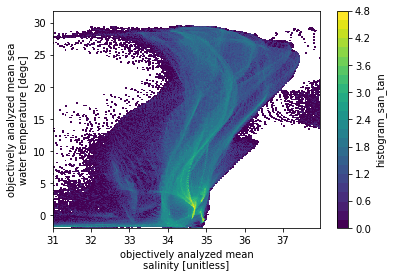

In [18]:
np.log10(hTS.T).plot(levels=31)

In [34]:
Temp.lev

<xarray.DataArray 'lev' (lev: 102)>
array([0.00e+00, 5.00e+00, 1.00e+01, 1.50e+01, 2.00e+01, 2.50e+01, 3.00e+01,
       3.50e+01, 4.00e+01, 4.50e+01, 5.00e+01, 5.50e+01, 6.00e+01, 6.50e+01,
       7.00e+01, 7.50e+01, 8.00e+01, 8.50e+01, 9.00e+01, 9.50e+01, 1.00e+02,
       1.25e+02, 1.50e+02, 1.75e+02, 2.00e+02, 2.25e+02, 2.50e+02, 2.75e+02,
       3.00e+02, 3.25e+02, 3.50e+02, 3.75e+02, 4.00e+02, 4.25e+02, 4.50e+02,
       4.75e+02, 5.00e+02, 5.50e+02, 6.00e+02, 6.50e+02, 7.00e+02, 7.50e+02,
       8.00e+02, 8.50e+02, 9.00e+02, 9.50e+02, 1.00e+03, 1.05e+03, 1.10e+03,
       1.15e+03, 1.20e+03, 1.25e+03, 1.30e+03, 1.35e+03, 1.40e+03, 1.45e+03,
       1.50e+03, 1.55e+03, 1.60e+03, 1.65e+03, 1.70e+03, 1.75e+03, 1.80e+03,
       1.85e+03, 1.90e+03, 1.95e+03, 2.00e+03, 2.10e+03, 2.20e+03, 2.30e+03,
       2.40e+03, 2.50e+03, 2.60e+03, 2.70e+03, 2.80e+03, 2.90e+03, 3.00e+03,
       3.10e+03, 3.20e+03, 3.30e+03, 3.40e+03, 3.50e+03, 3.60e+03, 3.70e+03,
       3.80e+03, 3.90e+03, 4.00e+03, 4.1

In [35]:
dz = np.diff(Temp.lev)
dz =np.insert(dz, 0, dz[0])
dz = xr.DataArray(dz, coords= {'lev':Temp.lev}, dims='lev')

In [37]:
Temp['dz'] = dz

In [30]:
Temp

<xarray.Dataset>
Dimensions:  (lat: 180, lev: 102, lon: 360, time: 1)
Coordinates:
  * time     (time) datetime64[ns] 2000-01-15
  * lev      (lev) float64 0.0 5.0 10.0 15.0 ... 5.2e+03 5.3e+03 5.4e+03 5.5e+03
  * lat      (lat) float64 -89.5 -88.5 -87.5 -86.5 -85.5 ... 86.5 87.5 88.5 89.5
  * lon      (lon) float64 -179.5 -178.5 -177.5 -176.5 ... 177.5 178.5 179.5
    dz       (lev) float64 5.0 5.0 5.0 5.0 5.0 ... 100.0 100.0 100.0 100.0 100.0
Data variables:
    tan      (time, lev, lat, lon) float32 ...
    tmn      (time, lev, lat, lon) float32 ...
    tdd      (time, lev, lat, lon) float32 ...
    tsd      (time, lev, lat, lon) float32 ...
    tse      (time, lev, lat, lon) float32 ...
    toa      (time, lev, lat, lon) float32 ...
    tgp      (time, lev, lat, lon) float32 ...
Attributes:
    title:          WOA13 annual 1 deg sea water temperature
    Conventions:    COARDS\nGrADS
    dataType:       Grid
    documentation:  http://apdrc.soest.hawaii.edu/datadoc/woa13.php
    hi

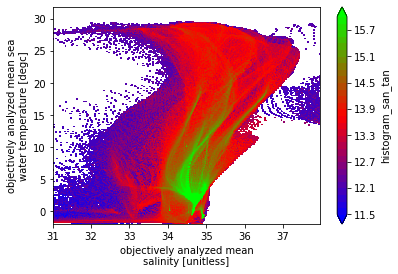

In [32]:
# histogram of number of data points weighted by volume resolution
# Note that depth is a non-uniform axis

# weight by volume of grid cell (resolution = 5degree, 1degree=110km)
dVol = Temp.dz*(5*110e3)*(5*110e3*np.cos(Temp.lat*np.pi/180)) 

# Note: The weights are automatically broadcast to the right size
hTSw = histogram(Salt.san, Temp.tan, bins=[sbins, tbins], weights=dVol)
np.log10(hTSw.T).plot(levels=31, vmin=11.5, vmax=16, cmap='brg')

In [38]:
Oxygen

<xarray.Dataset>
Dimensions:  (lat: 180, lev: 102, lon: 360, time: 1)
Coordinates:
  * time     (time) datetime64[ns] 2000-01-15
  * lev      (lev) float64 0.0 5.0 10.0 15.0 ... 5.2e+03 5.3e+03 5.4e+03 5.5e+03
  * lat      (lat) float64 -89.5 -88.5 -87.5 -86.5 -85.5 ... 86.5 87.5 88.5 89.5
  * lon      (lon) float64 -179.5 -178.5 -177.5 -176.5 ... 177.5 178.5 179.5
Data variables:
    oan      (time, lev, lat, lon) float32 ...
    omn      (time, lev, lat, lon) float32 ...
    odd      (time, lev, lat, lon) float32 ...
    osd      (time, lev, lat, lon) float32 ...
    ose      (time, lev, lat, lon) float32 ...
    ooa      (time, lev, lat, lon) float32 ...
    ogp      (time, lev, lat, lon) float32 ...
Attributes:
    title:          WOA13 annual 1 deg dissolved oxygen
    Conventions:    COARDS\nGrADS
    dataType:       Grid
    documentation:  http://apdrc.soest.hawaii.edu/datadoc/woa13.php
    history:        Wed May 08 13:22:39 HST 2019 : imported by GrADS Data Ser...

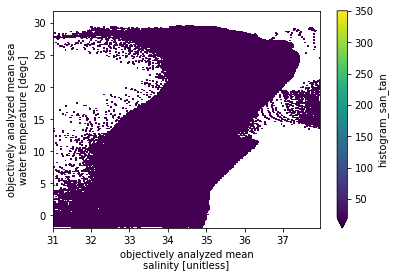

In [39]:
hTSO2 = (histogram(Salt.san.where(~np.isnan(Oxygen.oan)), 
                   Temp.tan.where(~np.isnan(Oxygen.oan)), 
                   bins=[sbins, tbins], 
                   weights=Oxygen.oan.where(~np.isnan(Oxygen.oan))*dVol)/
                histogram(Salt.san.where(~np.isnan(Oxygen.oan)), 
                          Temp.tan.where(~np.isnan(Oxygen.oan)), 
                          bins=[sbins, tbins], 
                          weights=dVol))



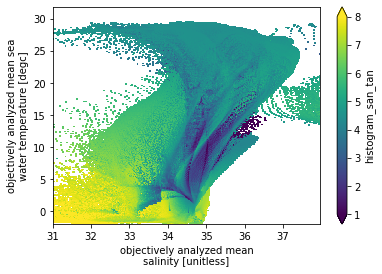

In [42]:
(hTSO2.T).plot(vmin=1, vmax=8)

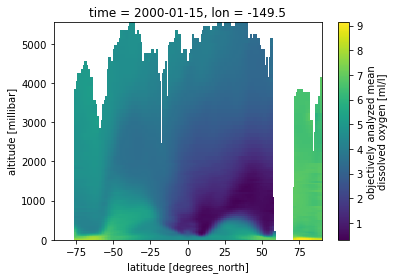

In [41]:
Oxygen.oan.isel(time=0).sel(lon=-150,method='nearest').plot()